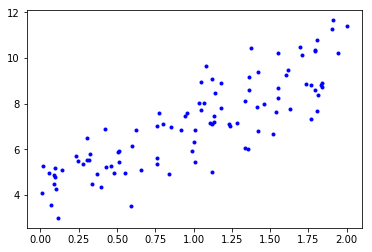

[[4.24519553]
 [2.86187616]]


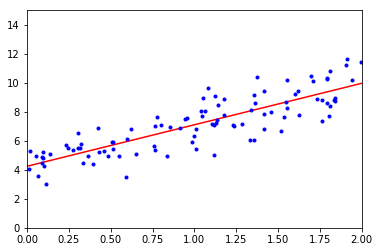

[[4.24519553]
 [2.86187616]]
[[3.57900503]
 [3.39035723]]
[[5.09568353]]
[4.41991997]
[5.05666082]
['target', 'target_names', 'DESCR', 'data', 'feature_names']
[2]
[[6.33134077e-07 5.75276067e-02 9.42471760e-01]]


/home/munachiso/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/munachiso/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


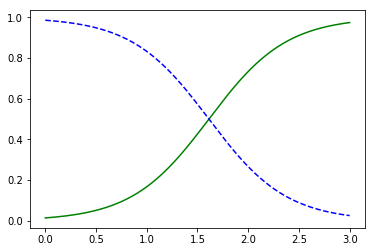

In [20]:
from sklearn import datasets
from sklearn.base import clone
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import numpy as np

##Functions
def plot_learning_curves(model, X, y):
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
 train_errors, val_errors = [], []
 for m in range(1, len(X_train)):
  model.fit(X_train[:m], y_train[:m])
  y_train_predict = model.predict(X_train[:m])
  y_val_predict = model.predict(X_val)
  train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
  val_errors.append(mean_squared_error(y_val_predict, y_val))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
##

##
#Generating some linear looking data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")
plt.show()
#computing θ using the Normal Equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print (theta_best)
#make predictions using θ:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict
#plotting the predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()
##







##Batch gradient descent 
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
 gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
 theta = theta - eta * gradients
print(theta)
##








## Stochastic Gradient Descent using a simple learning schedule
n_epochs = 50
m = 10
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
 return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
 for i in range(m):
  random_index = np.random.randint(m)
  xi = X_b[random_index:random_index+1]
  yi = y[random_index:random_index+1]
  gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
  eta = learning_schedule(epoch * m + i)
  theta = theta - eta * gradients
print(theta)
#SGD regressor class giving similar results
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_
##








##Polynomial regression
#generating some nonlinear data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
#transforming training data with polynomials features class
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
#fitting LinReg model to extended training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
#looking at the learning curves with polynomial regression
polynomial_regression = Pipeline((
 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("sgd_reg", LinearRegression()),
 ))
##










##Regularised linear models
#doing Ridge Regression with closed-form solution
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
print ( ridge_reg.predict([[1.5]]) )
#equivalently using SGD regressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
print ( sgd_reg.predict([[1.5]]) ) 
#elastic net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
print ( elastic_net.predict([[1.5]]) )
##








##Classifying flowers based on species type
iris = datasets.load_iris()
print( list(iris.keys()) )
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0
#training logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)
#estimated probabilities petal widths varying from 0 to 3cm:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
log_reg.predict([[1.7], [1.5]])
#Using a softmax regressor (logistic regression with multi_class set to "multinomial")
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

print( softmax_reg.predict([[5, 2]]) )
print( softmax_reg.predict_proba([[5, 2]]) )
##

